In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from split.model import Model
from datasets.ICDAR.ICDAR import Icdar, create_debug_image
import PIL
from matplotlib import pyplot as plt

In [2]:
def run_model_on_random_input(model):
    height = 100
    width = 200
    random_image = tf.random.uniform(shape=(1, height, width, 3), minval=0, maxval=256, dtype='int32')
    m(random_image)

In [3]:
m = Model()
run_model_on_random_input(m)
m.load_weights('/tmp/model.ckpt')

2022-01-27 11:03:22.243625: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 11.0.221, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2022-01-27 11:03:22.554091: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open /tmp/model.ckpt: DATA_LOSS: not an sstable (bad magic number): perhaps your file is in a different file format and you need to use a different restore operator?


In [4]:
ds = tfds.load('ICDAR', split='train[90%:]')

In [5]:
def get_predictions(test_image):
    test_image = tf.expand_dims(test_image, 0)
    outputs = m(test_image)
    return (
        tf.squeeze(outputs['horz_split_points_binary'], 0),
        tf.squeeze(outputs['vert_split_points_binary'], 0)
    )

2022-01-27 11:51:10.475551: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


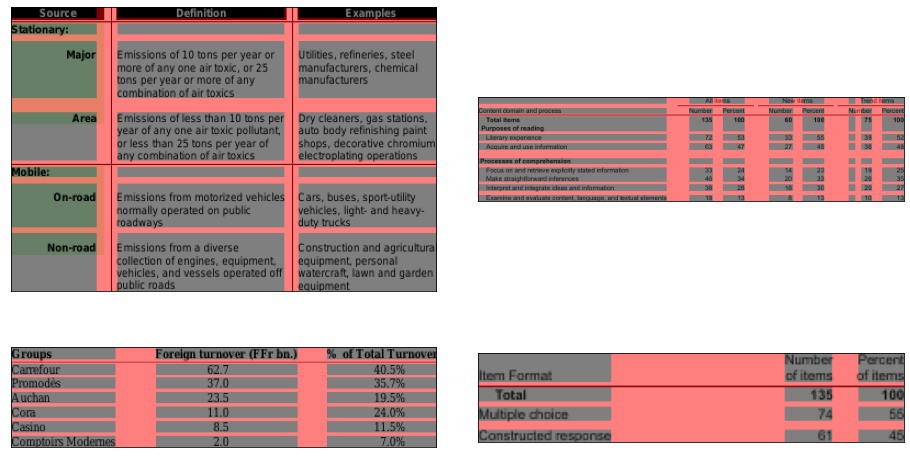

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(16,16))

for element, ax in zip(ds.take(4), axes.flat):
    horz_split_points_predictions, vert_split_points_predictions = get_predictions(element['image'])
    pil_image = PIL.Image.fromarray(element['image'].numpy())
    debug_image = create_debug_image(
        pil_image, horz_split_points_predictions, vert_split_points_predictions)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(debug_image)
fig.subplots_adjust(wspace=0.1, hspace=-0.6)

plt.savefig('images/split_model_predictions.png', bbox_inches='tight')
plt.show()